In [1]:
! pip install datakund-scraper
! pip install youtube-comment-scraper-python
! pip install wordcloud

In [2]:
from youtube_comment_scraper_python import *
import pandas as pd
import numpy as np 
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
youtube.open("https://www.youtube.com/watch?v=CVtRIU6tzD8") #link saus anda
youtube.keypress("pagedown") #mengatur untuk langsung turun page untuk membaca komentar, bisa di pause videonya sendiri

{'status': True}

In [4]:
data = []
halsausskrng=youtube.get_page_source()
halakhirssaus=''

while(True):
    if(halakhirssaus==halsausskrng):
        break
        
    halakhirssaus=halsausskrng
    respon=youtube.video_comments()

    for c in respon['body']:
        data.append(c)
        
    youtube.scroll()
    halsausskrng=youtube.get_page_source()

Progress: 100%|████████████████████████████████████████████████| 200.0/200 [01:16<00:00,  2.60it/s]
Progress: 100%|████████████████████████████████████████████████| 200.0/200 [02:32<00:00,  1.32it/s]
Progress: 100%|████████████████████████████████████████████████| 200.0/200 [03:51<00:00,  1.16s/it]
Progress: 100%|████████████████████████████████████████████████| 200.0/200 [05:18<00:00,  1.59s/it]
Progress: 100%|████████████████████████████████████████████████| 200.0/200 [08:17<00:00,  2.49s/it]
Progress: 100%|████████████████████████████████████████████████| 200.0/200 [15:28<00:00,  4.64s/it]
Progress: 100%|████████████████████████████████████████████████| 200.0/200 [18:07<00:00,  5.44s/it]
Progress: 100%|████████████████████████████████████████████████| 200.0/200 [18:59<00:00,  5.70s/it]
Progress: 100%|████████████████████████████████████████████████| 200.0/200 [19:48<00:00,  5.94s/it]
Progress: 100%|████████████████████████████████████████████████| 200.0/200 [14:13<00:00,  4.27s/it]


In [8]:
print("Banyak Row Data hasil scrapping :",len(data))
data[:10]

Banyak Row Data hasil scrapping : 1787


[{'Comment': 'The Peppa and Joj song brings be back to when I first watched Roscoe.',
  'Likes': '171',
  'Time': '11 months ago (edited)',
  'UserLink': '/channel/UC8cXp8nmggW9r2C_rcmPhsQ',
  'user': 'Rozi-Nozy-Dozy 2'},
 {'Comment': 'Joj and Susie are the best characters in the show.',
  'Likes': '24',
  'Time': '6 months ago',
  'UserLink': '/channel/UCrH2JX5hTNQ2ydCOWFrQMyQ',
  'user': '[GS] ★Yoshé★'},
 {'Comment': 'Roscoe is one of the best peppa pig editors ever😂😂😂😂😂😂😂😂😂❤️❤️❤️❤️❤️❤️😂😂😂😂😂',
  'Likes': '2',
  'Time': '2 months ago',
  'UserLink': '/channel/UCCFUJHhPYffHd2sjmLop2iw',
  'user': 'Dexter Williams'},
 {'Comment': '0:37 to 0:45 I hope they make a remix out of that! That would be Awsome!',
  'Likes': '15',
  'Time': '6 months ago (edited)',
  'UserLink': '/channel/UCSGp_YjwJM7NX1GbiAye1pg',
  'user': 'Repuplic Of MFGTeeV'},
 {'Comment': 'When I first watched roscoe I laughed so hard!',
  'Likes': '7',
  'Time': '4 months ago',
  'UserLink': '/channel/UC25-rQC0A7YZJiO861Pk

In [9]:
df = pd.DataFrame(data) # conver list to dataframe

df = df.replace('\n',' ', regex=True) # clean data

df = df[['Comment', 'Likes', 'Time','UserLink','user']].drop_duplicates(keep="first") # drop duplicate rows

df.to_csv('data.csv',index=False) # export data to csv

In [10]:
df.head()

,Comment,Likes,Time,UserLink,user
0,The Peppa and Joj song brings be back to when ...,171,11 months ago (edited),/channel/UC8cXp8nmggW9r2C_rcmPhsQ,Rozi-Nozy-Dozy 2
1,Joj and Susie are the best characters in the s...,24,6 months ago,/channel/UCrH2JX5hTNQ2ydCOWFrQMyQ,[GS] ★Yoshé★
2,Roscoe is one of the best peppa pig editors ev...,2,2 months ago,/channel/UCCFUJHhPYffHd2sjmLop2iw,Dexter Williams
3,0:37 to 0:45 I hope they make a remix out of t...,15,6 months ago (edited),/channel/UCSGp_YjwJM7NX1GbiAye1pg,Repuplic Of MFGTeeV
4,When I first watched roscoe I laughed so hard!,7,4 months ago,/channel/UC25-rQC0A7YZJiO861PkDtA,Olive Louise


In [11]:
label = df['Comment']
label.head()

0    The Peppa and Joj song brings be back to when ...
1    Joj and Susie are the best characters in the s...
2    Roscoe is one of the best peppa pig editors ev...
3    0:37 to 0:45 I hope they make a remix out of t...
4       When I first watched roscoe I laughed so hard!
Name: Comment, dtype: object

In [12]:
processed_features = []

for sentence in range(0, len(label)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(label.iloc[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'^[a-zA-Z]\s+', '', processed_feature) 
    
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [13]:
import nltk
nltk.download('punkt') # Sentence Tokenizer
nltk.download('stopwords') # Stopword

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords
stop=nltk.corpus.stopwords.words('English')
label = label.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
label.head()

0    The Peppa Joj song brings back I first watched...
1                      Joj Susie best characters show.
2    Roscoe one best peppa pig editors ever😂😂😂😂😂😂😂😂...
3    0:37 0:45 I hope make remix that! That would A...
4          When I first watched roscoe I laughed hard!
Name: Comment, dtype: object

In [15]:
label = label.str.replace('[^\w\s]','', regex = True)
label.head()

0    The Peppa Joj song brings back I first watched...
1                       Joj Susie best characters show
2               Roscoe one best peppa pig editors ever
3     037 045 I hope make remix that That would Awsome
4           When I first watched roscoe I laughed hard
Name: Comment, dtype: object

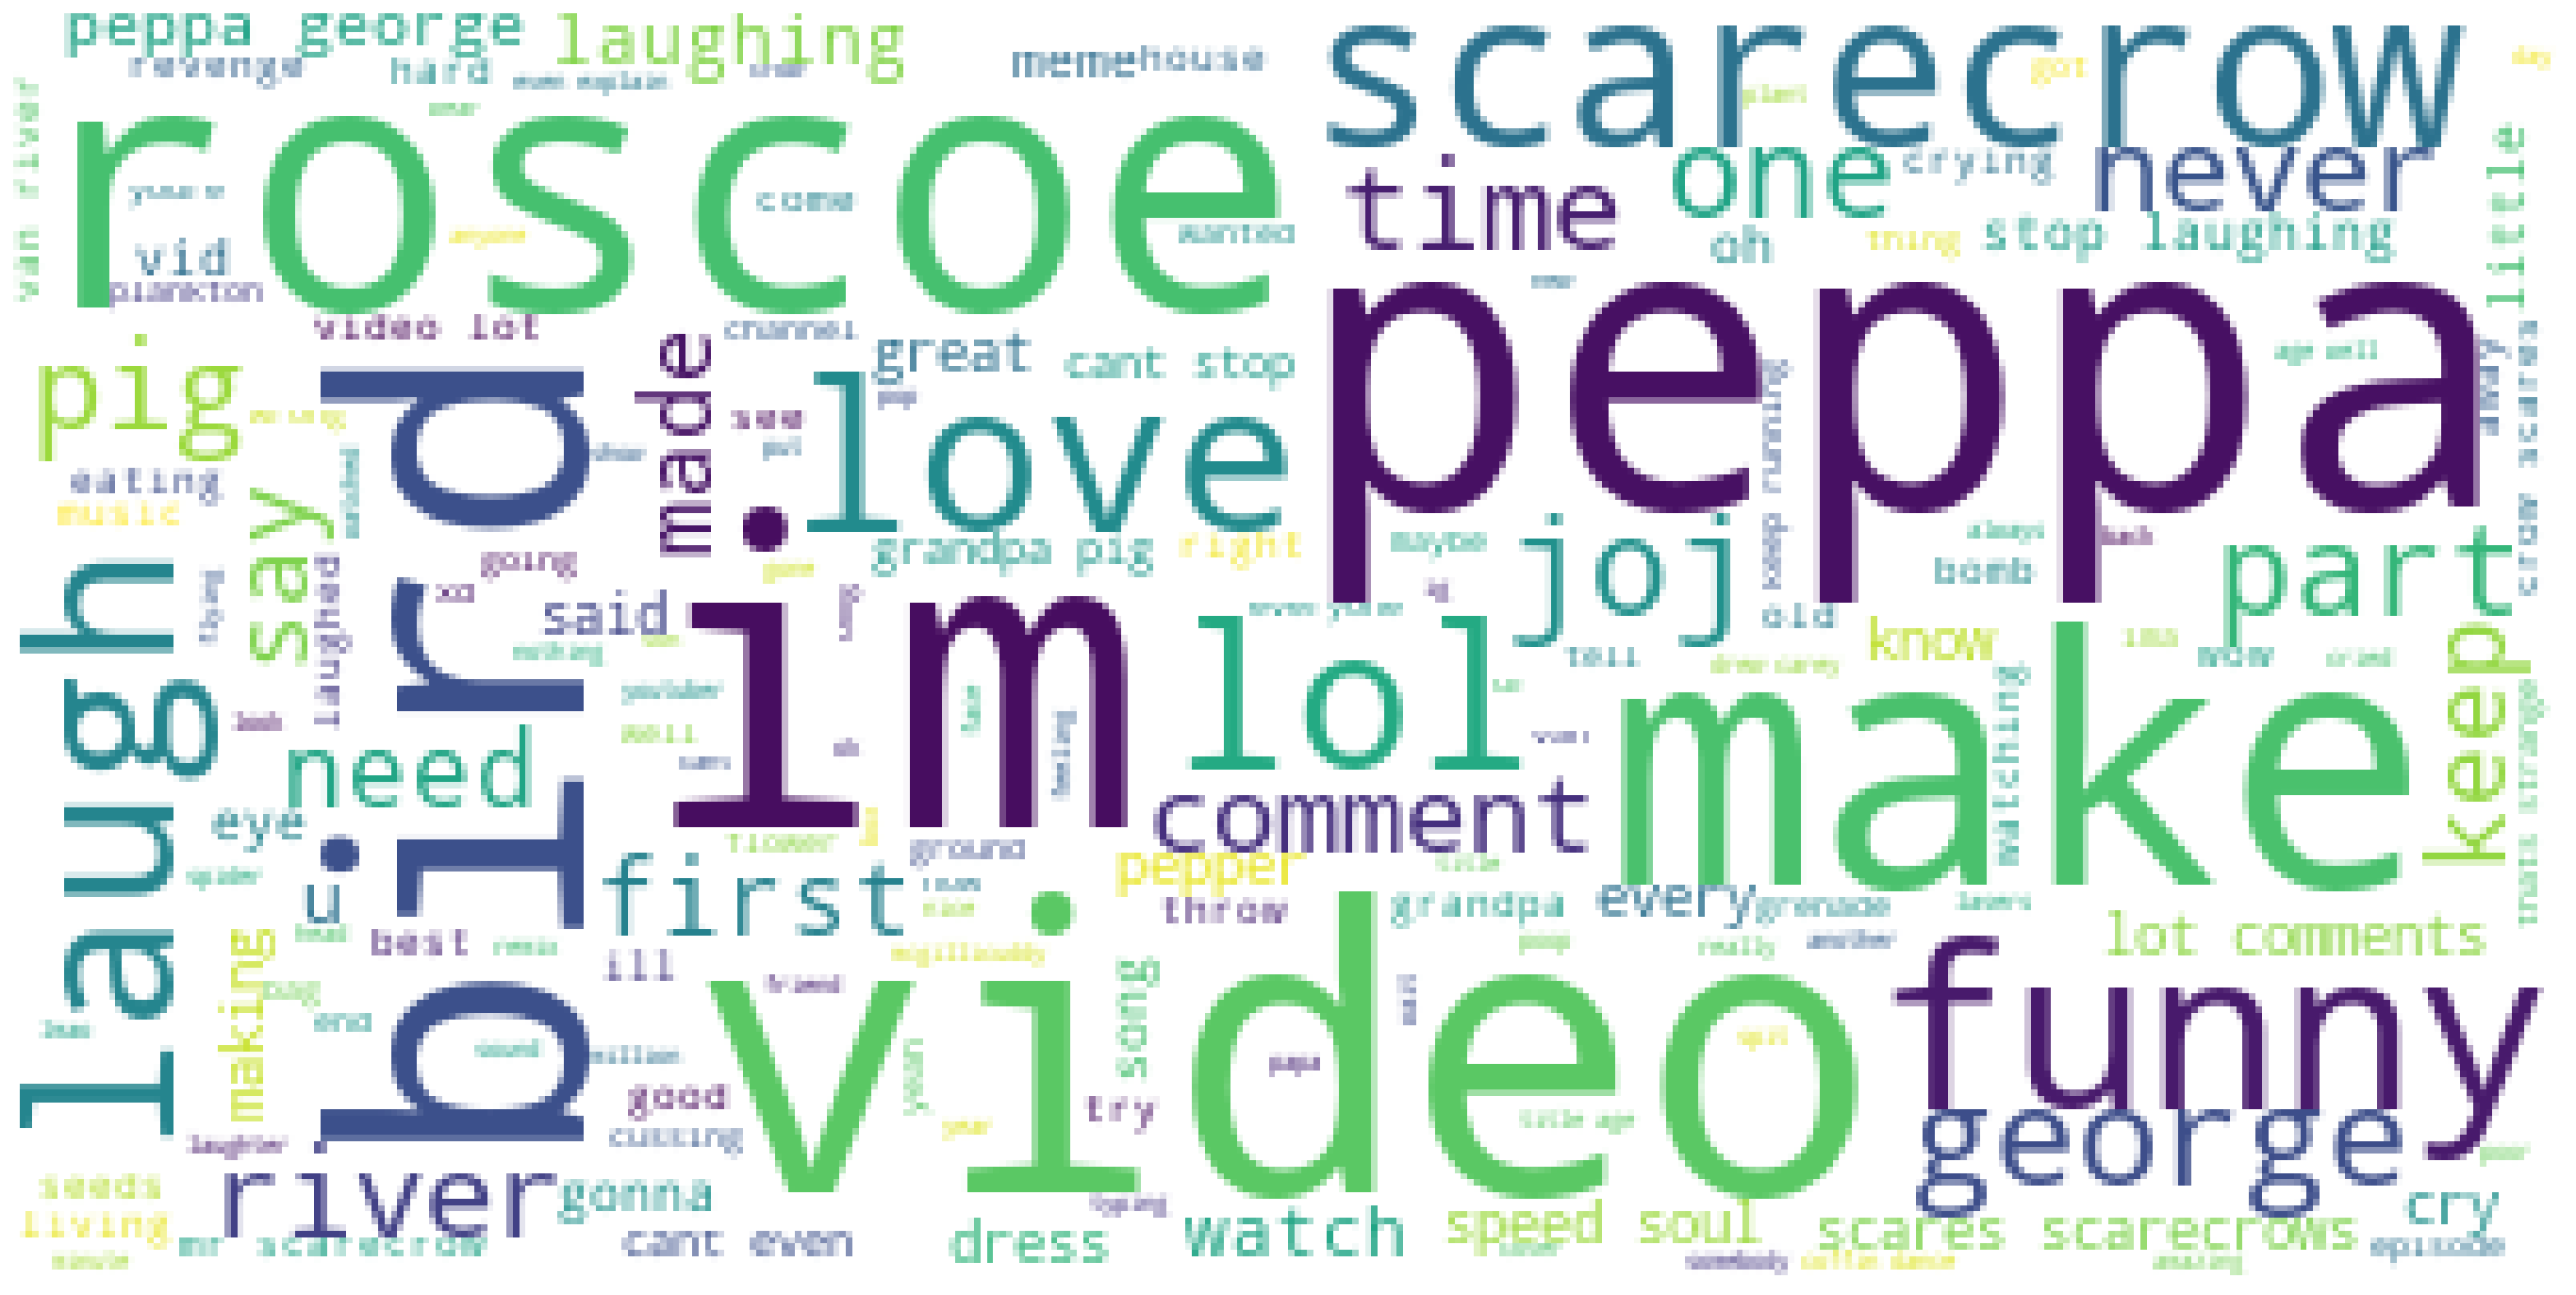

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string=" ".join(label.str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                         ).generate(word_string)

plt.figure(figsize=(50,25))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()